In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
d1, d2, ds = 3, 8, 1  # Degree range and step
const n, a, b = 2, 1, 4 
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = tref # Objective function

tref (generic function with 1 method)

In [2]:
coeffs_poly_approx = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.1)

dimension Vector space: 10
sample size: 16
dimension Vector space: 15
sample size: 25
dimension Vector space: 21
sample size: 49
dimension Vector space: 28
sample size: 64
dimension Vector space: 36
sample size: 81
dimension Vector space: 45
sample size: 121


6-element Vector{Vector{Float64}}:
 [1.167650103717976, -1.4217459649045805, -0.10223398969972249, 0.21082511703120346, 0.5102508359449891, 1.936750611602167e-16, 0.8798701727759479, 0.2406876818123617, 0.8798701727759479, -1.1901766284197506]
 [1.5675292746803322, -0.8754536257386577, 0.03873662290621392, -0.8607560139211737, -0.21330580841154878, 0.03323467592267845, 5.168858348810836e-17, 0.8871492242046461, -4.5417901487803644e-17, 0.11237174816901016, 0.8871492242046457, -1.0904990263666415e-16, 0.9961782111150842, -2.666501352260103e-16, -0.5079257162957721]
 [0.8644182711129395, -0.41973710983146467, -0.05616596643520181, -0.8028794610125575, -0.04375499197861103, -0.5472545316949464, 0.7678122744988146, -4.909106471113145e-17, 0.8869333581203275, -1.0099892751262872e-16  …  0.4792088359807595, 0.8869333581203278, -1.2113280564768404e-16, -0.3864658327357059, 0.13177606940369066, -5.501760491093899e-17, -0.3864658327357058, 0.5399984998178567, -0.14671057260736056, 0.35921374393

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, ProgressLogging, DataFrames

include("hom_solve.jl") # Include the homotopy solver and main function
vars = @polyvar(x[1:n]) # Define polynomial ring 
h_x, h_y, col = main_2d(n, d1, d2, ds, coeffs_poly_approx) # main_2d is in hom_solve.jl
df = DataFrame(x=C * h_x, y=C * h_y, col=col)
df[!, :result] = [f([df.x[i], df.y[i]]) for i in 1:nrow(df)];


Computing mixed cells... 2    Time: 0:00:00
Computing mixed cells... 3    Time: 0:00:01
  mixed_volume:  4


Tracking 4 paths...  50%|███████████████▌               |  ETA: 0:00:07



Tracking 4 paths... 100%|███████████████████████████████| Time: 0:00:07
  # paths tracked:                  4
  # non-singular solutions (real):  4 (4)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         4 (4)
Degree: 3
Number of solutions: 2
Tracking 9 paths...  22%|██████▉                        |  ETA: 0:00:09



Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:02
  # paths tracked:                  9
  # non-singular solutions (real):  9 (7)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         9 (7)
Degree: 4
Number of solutions: 5
Tracking 16 paths...  12%|███▊                          |  ETA: 0:00:18



Tracking 16 paths... 100%|██████████████████████████████| Time: 0:00:02
  # paths tracked:                  16
  # non-singular solutions (real):  16 (12)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         16 (

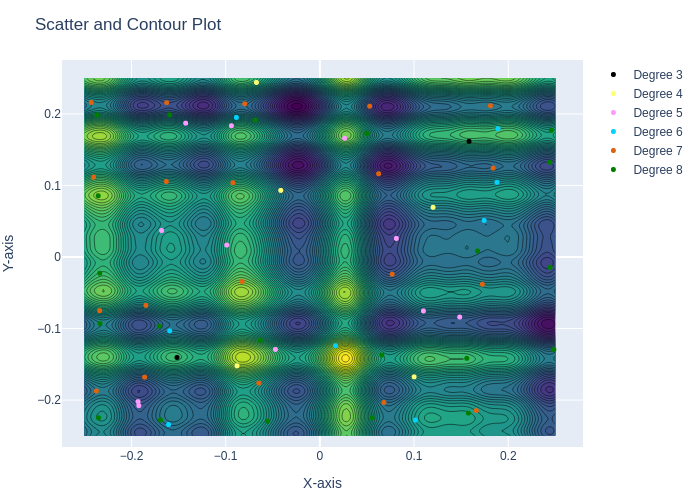

In [5]:
using PlotlyJS, Colors

# Define the function and domain

# Generate the grid and evaluate the function
N = 150  # resolution of the grid
x = range(-C, C, length=N)
y = range(-C, C, length=N)
z = [tref([xi, yi]) for yi in y, xi in x]

# sc_plt = scatter(x=C* h_x, y=C* h_y, mode="markers", marker_color=col, marker_size=5);
# Generate a color palette based on the number of unique `col` values
unique_cols = unique(df.col)
num_colors = length(unique_cols)
color_palette = distinguishable_colors(num_colors)

# Map the `col` values to the corresponding colors
col_to_color = Dict(unique_cols .=> color_palette)

# Create individual scatter traces for each unique `col` value
scatter_traces = [scatter(x=df[df.col .== c, :x], y=df[df.col .== c, :y], mode="markers", marker=attr(color=col_to_color[c], size=5), name="Degree $c") for c in unique_cols]

# Create the contour plot
cp = contour(x=x, y=y, z=z, ncontours=80, colorscale="Viridis", showscale=false)

# Combine contour plot and scatter traces
all_traces = [cp; scatter_traces...]

# Customize layout to handle legend groups
layout = Layout(
    title="Scatter and Contour Plot",
    xaxis_title="X-axis",
    yaxis_title="Y-axis",
    legend=(tracegroupgap=10, groupclick="toggleitem")
)

# Display the combined plot with legend
display(plot(all_traces, layout))



Doesn't make too much sense, but maybe we could plot the level sets of the polynomial approximants